## Importing Necessary Libraries

In [ ]:
import numpy as np
import math
import random
import matplotlib.pyplot as plt
from PIL import Image


## Preprocessing Data

In [ ]:
patterns = []
classes = []
filename = 'Iris.txt'
file = open(filename, 'r')
for line in file.readlines():
    row = line.strip().split(',')
    patterns.append(row[0:4])
    classes.append(row[4])
print("Iris Data Loaded")
file.close
patterns = np.asarray(patterns, dtype=np.float32)
sample_no = np.random.randint(0, len(patterns))
print("Sample pattern: " + str(patterns[int(sample_no)]))
print("Class of the above pattern: " + str(classes[int(sample_no)]))


Iris Data Loaded
Sample pattern: [7.9 3.8 6.4 2. ]
Class of the above pattern: Iris-virginica


## A heuristic formula for calculating no. of map units

In [ ]:
def mapunits(input_len, size='small'):
    heuristic_map_units = 5*input_len**0.54321
    if size == 'big':
        heuristic_map_units = 4*(heuristic_map_units)
    else:
        heuristic_map_units = 0.25*(heuristic_map_units)
    return heuristic_map_units
map_units = mapunits(len(patterns), size='big')
print("Heuristically computed appropriate no. of map units: "+str(int(map_units)))

Heuristically computed appropriate no. of map units: 304


## Self Organizing Map Training

In [ ]:
def Eucli_dists(MAP,x):
    x = x.reshape((1,1,-1))
    Eucli_MAP = MAP - x
    Eucli_MAP = Eucli_MAP**2
    Eucli_MAP = np.sqrt(np.sum(Eucli_MAP,2))
    return Eucli_MAP
input_dimensions = 4
map_width = 11
map_height = 11
MAP = np.random.uniform(size=(map_height,map_width,input_dimensions))
prev_MAP = np.zeros((map_height,map_width,input_dimensions))
radius0 = max(map_width,map_height)/2
learning_rate0 = 0.1
coordinate_map = np.zeros([map_height,map_width,2],dtype=np.int32)
for i in range(0,map_height):
    for j in range(0,map_width):
        coordinate_map[i][j] = [i,j]
epochs = 5000
radius=radius0
learning_rate = learning_rate0
max_iterations = len(patterns)+1
too_many_iterations = 10*max_iterations
convergence = [1]
timestep=1
e=0.001 
flag=0
epoch=0
while epoch<epochs: 
    shuffle = np.random.randint(len(patterns), size=len(patterns))
    for i in range(len(patterns)):       
        J = np.linalg.norm(MAP - prev_MAP)
        if  J <= e: 
            flag=1
            break
        else:
            pattern = patterns[shuffle[i]]
            pattern_ary = np.tile(pattern, (map_height, map_width, 1))
            Eucli_MAP = np.linalg.norm(pattern_ary - MAP, axis=2)
            BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
            prev_MAP = np.copy(MAP)
            for i in range(map_height):
                for j in range(map_width):
                    distance = np.linalg.norm([i - BMU[0], j - BMU[1]])
                    if distance <= radius:
                        MAP[i][j] = MAP[i][j] + learning_rate*(pattern-MAP[i][j])
            
            learning_rate = learning_rate0*(1-(epoch/epochs))
            radius = radius0*math.exp(-epoch/epochs)            
            timestep+=1
    if J < min(convergence):
        print('Lower error found: %s' %str(J) + ' at epoch: %s' % str(epoch))
        print('\tLearning rate: ' + str(learning_rate))
        print('\tNeighbourhood radius: ' + str(radius))
        MAP_final = MAP
    convergence.append(J)
    if flag==1:
        break
    epoch+=1

Lower error found: 0.7206333972310246 at epoch: 0
	Learning rate: 0.1
	Neighbourhood radius: 5.5
Lower error found: 0.47597187126049356 at epoch: 2
	Learning rate: 0.09996000000000001
	Neighbourhood radius: 5.497800439941339
Lower error found: 0.4445028732794773 at epoch: 8
	Learning rate: 0.09984
	Neighbourhood radius: 5.491207036246835
Lower error found: 0.4007563349052098 at epoch: 16
	Learning rate: 0.09968
	Neighbourhood radius: 5.482428129986681
Lower error found: 0.37256306203802253 at epoch: 45
	Learning rate: 0.09910000000000001
	Neighbourhood radius: 5.45072208325086
Lower error found: 0.35529759387329485 at epoch: 70
	Learning rate: 0.09860000000000001
	Neighbourhood radius: 5.423536493445741
Lower error found: 0.2557270185959104 at epoch: 173
	Learning rate: 0.09654000000000001
	Neighbourhood radius: 5.31295454625542
Lower error found: 0.228851700089959 at epoch: 346
	Learning rate: 0.09308
	Neighbourhood radius: 5.132270183741116
Lower error found: 0.18857227775519103 at e

## Visualization of Loss

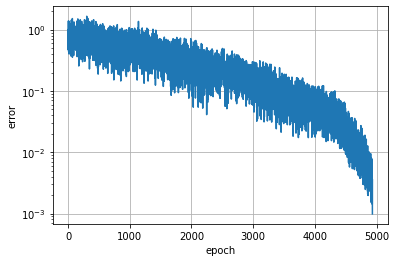

Number of timesteps: 739613
Final error: 0.0009855062869488305


In [ ]:
plt.plot(convergence)
plt.ylabel('error')
plt.xlabel('epoch')
plt.grid(True)
plt.yscale('log')
plt.show()
print('Number of timesteps: ' + str(timestep))
print('Final error: ' + str(J))


# Visualization of the Clustering result

Red = Iris-Setosa
Blue = Iris-Virginica
Green = Iris-Versicolor


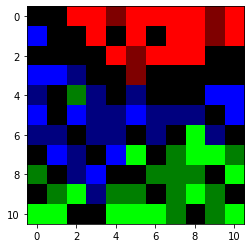

In [ ]:
BMU = np.zeros([2], dtype=np.int32)
result_map = np.zeros([map_height, map_width, 3], dtype=np.float32)
i = 0
for pattern in patterns:
    pattern_ary = np.tile(pattern, (map_height, map_width, 1))
    Eucli_MAP = np.linalg.norm(pattern_ary - MAP_final, axis=2)
    BMU = np.unravel_index(np.argmin(Eucli_MAP, axis=None), Eucli_MAP.shape)
    x = BMU[0]
    y = BMU[1]
    if classes[i] == 'Iris-setosa':
        if result_map[x][y][0] <= 0.5:
            result_map[x][y] += np.asarray([0.5, 0, 0])
    elif classes[i] == 'Iris-virginica':
        if result_map[x][y][1] <= 0.5:
            result_map[x][y] += np.asarray([0, 0.5, 0])
    elif classes[i] == 'Iris-versicolor':
        if result_map[x][y][2] <= 0.5:
            result_map[x][y] += np.asarray([0, 0, 0.5])
    i += 1
result_map = np.flip(result_map, 0)
print("Red = Iris-Setosa")
print("Blue = Iris-Virginica")
print("Green = Iris-Versicolor")

plt.imshow(result_map, interpolation='nearest')
plt.show()